# Collatz Python
Calculate length of collatz sequence using python

In [40]:
import time

import datashader as ds
import pandas as pd
from numba import njit, prange
import numpy as np

import matplotlib.pyplot as plt
from datashader.mpl_ext import dsshow


%matplotlib inline



In [34]:
@njit
def collatz_length(n):
    len = 0
    while n > 1:
        len+=1
        if n%2 == 0:
            n = n / 2
        else:
            n = (3*n+1)/2

    return len

@njit(parallel=True)
def collatz_length2(nmax):
    """ returns list of length n """
    #n = prange(1, nmax)
    l = np.zeros(nmax, dtype=np.int32)
    for i in prange(nmax):
        l[i] = collatz_length(i)

    return l
        
    

In [32]:
collatz_length2(5)

array([0, 0, 1, 5, 2, 0])

Calculation time is 220.47232818603516
Plot time is 135.67431211471558


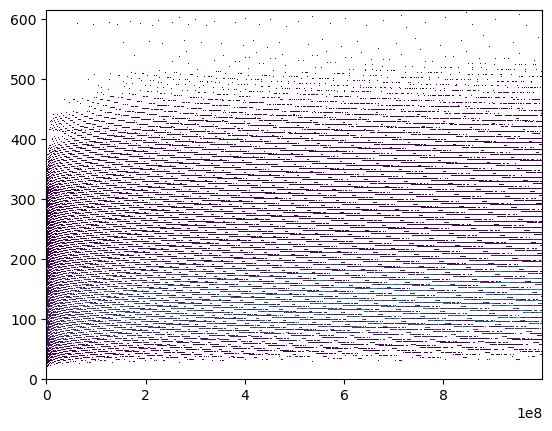

In [77]:
tstart = time.time()
n = np.arange(1_000_000_000, dtype=np.int32)
#l = [collatz_length(i) for i in n]
l = collatz_length2(n[-1]+1)
tstop = time.time()
print(f"Calculation time is {tstop-tstart}")

# can't figure out how to pass numpy values directly to points
data = pd.DataFrame()
data['x'] = n
data['y'] = l
agg = ds.Canvas().points(data, 'x', 'y')
img = ds.tf.shade(agg)
tplot = time.time()
print(f"Plot time is {tplot-tstop}")
#img # this will show the plot as an image without axes

fig, ax = plt.subplots()
dsshow(data, ds.Point('x', 'y'), ax=ax, aspect='auto')
plt.show()